# Project 1 Example
### Alec K. Mattu (UTA)
### INST 414
### 09/30/2021

# Instructions
(1) Open your dataset and see that there are some NA values throughout. These are the missing values. Omit every row that has at least one missing value. From this point, you only work with this updated dataset.

(2) Now define three new columns: 
- column L which contains the number of words for each song, 
- column V which contains the number of UNIQUE words for each song (that is, the vocabulary size of each song), 
- column D containing the ratio V/L (this is the rate of new word usage, characterizing vocabulary novelty)
append these three columns to the dataset. So now the dataset must have 7 columns, and the three right-most columns must be L, V, and D. 

(3) Perform min-max normalization to the L, V, and D columns (the taget range is between zero and one), and append to the dataset the three new columns normalized_L, normalized_V, and normalized_D. So now the dataset must have 10 columns, and the three right-most columns must be L, V, and D. 

(4) Perform normalization and calculate the standard scores (z-score) for the  L, V, and D columns, and append to the dataset three new columns z_score_L, z_score_V, and z_score_d. So now the dataset must have 13 columns, and the three right-most columns must be L, V, and D. 

(5) Plot the histogram of of normalized_L, normalized_V, and normalized_D. 

(6) Use seaborn's RELPLOT function to visualize the trends of normalized_L, normalized_V, and normalized_D. 

# Solution

## Part 0 - Preparation

In [47]:
# Import required libraries
import csv
import seaborn as sns
import pandas as pd
import sklearn.feature_extraction 
import matplotlib.pyplot as plt
import json as js # Optional: For pretty printing JSON
from sklearn.preprocessing import minmax_scale

In [48]:
'''
This approach is optional, you can simplify it by using

df=pd.read_csv("dataset.csv")

as explained in EDA_Seaborn lectures
'''

# Hold songs in a list
songs = []

# Open CSV file with handle
with open("dataset.csv") as csv_file:
    # Create a file reader
    file_reader = csv.DictReader(csv_file)
    
    # Loop through CSV rows
    for row in file_reader:
        songs.append(row)

# View song list excerpt
print(js.dumps(songs[12], indent=4, sort_keys=True))

{
    "artist": "george-harrison",
    "lyrics": "My sweet Lord\nHm, my Lord\nHm, my Lord\nI really want to see you\nReally want to be with you\nReally want to see you Lord\nBut it takes so long, my Lord\nMy sweet Lord\nHm, my Lord\nHm, my Lord\nI really want to know you\nReally want to go with you\nReally want to show you Lord\nThat it won't take long, my Lord (hallelujah)\nMy sweet Lord (hallelujah)\nHm, my Lord (hallelujah)\nMy sweet Lord (hallelujah)\nI really want to see you\nReally want to see you\nReally want to see you, Lord\nReally want to see you, Lord\nBut it takes so long, my Lord (hallelujah)\nMy sweet Lord (hallelujah)\nHm, my Lord (hallelujah)\nMy, my, my Lord (hallelujah)\nI really want to know you (hallelujah)\nReally want to go with you (hallelujah)\nReally want to show you Lord (aaah)\nThat it won't take long, my Lord (hallelujah)\nHmm (hallelujah)\nMy sweet Lord (hallelujah)\nMy, my, Lord (hallelujah)\nHm, my Lord (hare krishna)\nMy, my, my Lord (hare krishna)\nOh h

## Part 1 - Preprocessing

In [49]:
# Instantiate a pandas DataFrame variable
df = pd.DataFrame(songs)

# Optional: Rename columns
df.columns = ["Title", "Artist", "Year", "Lyrics"]

In [50]:
df

,Title,Artist,Year,Lyrics
0,the-battle,blood-sweat-tears,1970,While the king and queen lie sleeping\nAnd the...
1,hey-jude,count-basie,1970,"Hey Jude, don't make it bad\nTake a sad song a..."
2,time,david-bowie,1973,"Time, he's waiting in the wings\nHe speaks of ..."
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972,"Birds flying high,\nIn search of a clear blue ..."
4,day-by-day,carmen-mcrae,1972,Day by day I'm falling more in love with you\n...
...,...,...,...,...
4495,the-dark-side-of-the-rainbow,da-grym-reefer,2012,Da Grym Reefer:\nI be sitting back\nThinking o...
4496,tester,anthrax,2006,"I've changed, by staying the same\nWhat does i..."
4497,killing-me-inside,crossfade,2011,There's a dream that comes to me\nAnd it whisp...
4498,babel,cruel-tie,2015,"I'm stepping down, hurrin' up. Settle down. Do..."


In [51]:
# Drop rows where any columns are null
df.dropna(axis = "columns")

,Title,Artist,Year,Lyrics
0,the-battle,blood-sweat-tears,1970,While the king and queen lie sleeping\nAnd the...
1,hey-jude,count-basie,1970,"Hey Jude, don't make it bad\nTake a sad song a..."
2,time,david-bowie,1973,"Time, he's waiting in the wings\nHe speaks of ..."
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972,"Birds flying high,\nIn search of a clear blue ..."
4,day-by-day,carmen-mcrae,1972,Day by day I'm falling more in love with you\n...
...,...,...,...,...
4495,the-dark-side-of-the-rainbow,da-grym-reefer,2012,Da Grym Reefer:\nI be sitting back\nThinking o...
4496,tester,anthrax,2006,"I've changed, by staying the same\nWhat does i..."
4497,killing-me-inside,crossfade,2011,There's a dream that comes to me\nAnd it whisp...
4498,babel,cruel-tie,2015,"I'm stepping down, hurrin' up. Settle down. Do..."


## Part 2 - New Columns

In [52]:
# (A) Generate the unique number of words for each song
# Instantiate the bag of words (Count Vectorizer)
bower = sklearn.feature_extraction.text.CountVectorizer(
    lowercase  = True,
    stop_words = "english"
)

# Form a matrix with Sklearn
matrix = bower.fit_transform(df["Lyrics"])
matrix_df = pd.DataFrame(matrix.toarray())

# Turn the matrix into a series (single column)
length_series = matrix_df.sum(axis = 1, skipna = True)

# Merge the new series into the existing DataFrame
df.drop('L', axis = 1, inplace = True, errors = 'ignore')
df = pd.merge(df, length_series.rename('L'), left_index = True, right_index = True)
df.head()

,Title,Artist,Year,Lyrics,L
0,the-battle,blood-sweat-tears,1970,While the king and queen lie sleeping\nAnd the...,103
1,hey-jude,count-basie,1970,"Hey Jude, don't make it bad\nTake a sad song a...",98
2,time,david-bowie,1973,"Time, he's waiting in the wings\nHe speaks of ...",197
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972,"Birds flying high,\nIn search of a clear blue ...",43
4,day-by-day,carmen-mcrae,1972,Day by day I'm falling more in love with you\n...,29


In [53]:
# (B) Count only the unique values
# Instantiate the bag of words (Count Vectorizer)
bower = sklearn.feature_extraction.text.CountVectorizer(
    lowercase  = True,
    stop_words = "english"
)

# Form a matrix with Sklearn
matrix = bower.fit_transform(df["Lyrics"])
matrix_df = pd.DataFrame(matrix.toarray())

# Find word counts greater than 0
unique_words_series = matrix_df > 0

# Sum the NUMBER of columns with words occuring 1 or more times
unique_words_series = unique_words_series.sum(axis = 1, skipna = True)
unique_word_df = unique_words_series.to_frame();
unique_word_df.columns = ["V"]

# Merge the new series into the existing DataFrame
df.drop('V', axis = 1, inplace = True, errors = 'ignore')
df = pd.merge(df, unique_word_df, left_index = True, right_index = True)
df.head()

,Title,Artist,Year,Lyrics,L,V
0,the-battle,blood-sweat-tears,1970,While the king and queen lie sleeping\nAnd the...,103,70
1,hey-jude,count-basie,1970,"Hey Jude, don't make it bad\nTake a sad song a...",98,41
2,time,david-bowie,1973,"Time, he's waiting in the wings\nHe speaks of ...",197,74
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972,"Birds flying high,\nIn search of a clear blue ...",43,38
4,day-by-day,carmen-mcrae,1972,Day by day I'm falling more in love with you\n...,29,19


In [54]:
# (C) Ratio of Unique-to-Total columns (V/L)
# Simply divide V (unique length) by L (total length)
df.drop('D', axis = 1, inplace = True, errors = 'ignore')
df["D"] = df["V"] / df["L"] 
df.head()

,Title,Artist,Year,Lyrics,L,V,D
0,the-battle,blood-sweat-tears,1970,While the king and queen lie sleeping\nAnd the...,103,70,0.679612
1,hey-jude,count-basie,1970,"Hey Jude, don't make it bad\nTake a sad song a...",98,41,0.418367
2,time,david-bowie,1973,"Time, he's waiting in the wings\nHe speaks of ...",197,74,0.375635
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972,"Birds flying high,\nIn search of a clear blue ...",43,38,0.883721
4,day-by-day,carmen-mcrae,1972,Day by day I'm falling more in love with you\n...,29,19,0.655172


## Part 3 - Min-Max Normalization

In [55]:
# Optional: Do it individually
# OR: df[["norm_L", "norm_V", "norm_D"]] = minmax_scale(df[["L", "V", "D"]])

# (A) Scale column L
df["normalized_L"] = minmax_scale(df['L'])

# (B) Scale column V
df["normalized_V"] = minmax_scale(df['V'])

# (C) Scale column D
df["normalized_D"] = minmax_scale(df['D'])

# (D) Reorder columns to put L, V, D at the rightmost position
df = df[["Title", "Artist", "Year", "Lyrics", "normalized_L", "normalized_V",
    "normalized_D", "L", "V", "D"]]

# See output
df.head()

,Title,Artist,Year,Lyrics,normalized_L,normalized_V,normalized_D,L,V,D
0,the-battle,blood-sweat-tears,1970,While the king and queen lie sleeping\nAnd the...,0.096987,0.137525,0.673330,103,70,0.679612
1,hey-jude,count-basie,1970,"Hey Jude, don't make it bad\nTake a sad song a...",0.092279,0.080550,0.406963,98,41,0.418367
2,time,david-bowie,1973,"Time, he's waiting in the wings\nHe speaks of ...",0.185499,0.145383,0.363392,197,74,0.375635
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972,"Birds flying high,\nIn search of a clear blue ...",0.040490,0.074656,0.881441,43,38,0.883721
4,day-by-day,carmen-mcrae,1972,Day by day I'm falling more in love with you\n...,0.027307,0.037328,0.648411,29,19,0.655172


## Part 4 - Calculating Z-Scores
### Used to determine how far from the mean the value is

In [56]:
# (A) Z-Score for Length
df["z_score_L"] = (df["L"] - df["L"].mean()) / df["L"].std(ddof = 0)

# (B) Z-Score for Unique Word Count
df["z_score_V"] = (df["V"] - df["V"].mean()) / df["V"].std(ddof = 0)

# (C) Z-Score for Ratio of Length-to-Unique 
df["z_score_D"] = (df["D"] - df["D"].mean()) / df["D"].std(ddof = 0)

# (D) Reorder columns to put L, V, D at the rightmost position
df = df[["Title", "Artist", "Year", "Lyrics", "normalized_L", "normalized_V",
    "normalized_D", "z_score_L", "z_score_V", "z_score_D", "L", "V", "D"]]

# See output
df.head()

,Title,Artist,Year,Lyrics,normalized_L,normalized_V,normalized_D,z_score_L,z_score_V,z_score_D,L,V,D
0,the-battle,blood-sweat-tears,1970,While the king and queen lie sleeping\nAnd the...,0.096987,0.137525,0.673330,0.023763,0.329717,0.396079,103,70,0.679612
1,hey-jude,count-basie,1970,"Hey Jude, don't make it bad\nTake a sad song a...",0.092279,0.080550,0.406963,-0.040895,-0.348083,-0.942847,98,41,0.418367
2,time,david-bowie,1973,"Time, he's waiting in the wings\nHe speaks of ...",0.185499,0.145383,0.363392,1.239333,0.423207,-1.161861,197,74,0.375635
3,we-can-make-the-world-a-whole-lot-brighter,the-brady-bunch,1972,"Birds flying high,\nIn search of a clear blue ...",0.040490,0.074656,0.881441,-0.752133,-0.418200,1.442178,43,38,0.883721
4,day-by-day,carmen-mcrae,1972,Day by day I'm falling more in love with you\n...,0.027307,0.037328,0.648411,-0.933176,-0.862275,0.270823,29,19,0.655172


## Part 5 - Plotting Normalized Columns

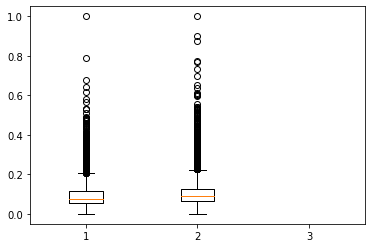

In [57]:
# Optional: Plot all three separately
# plt.boxplot([df["normalized_L"]]);
# plt.boxplot([df["normalized_V"]]);
# plt.boxplot([df["normalized_D"]]);

# (A) Plot the histogram of L, V, D
plt.boxplot([df["normalized_L"], df["normalized_V"], df["normalized_D"]]);

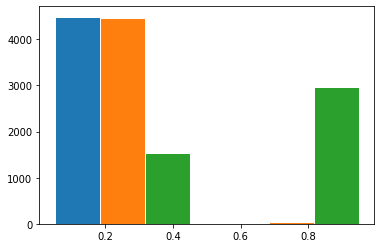

In [58]:
# (A) Plot the histogram of normalized L/V/D
plt.hist(df[["normalized_L", "normalized_V", "normalized_D"]], edgecolor = "white", bins = 2);

## Part 6 - SNS Trends

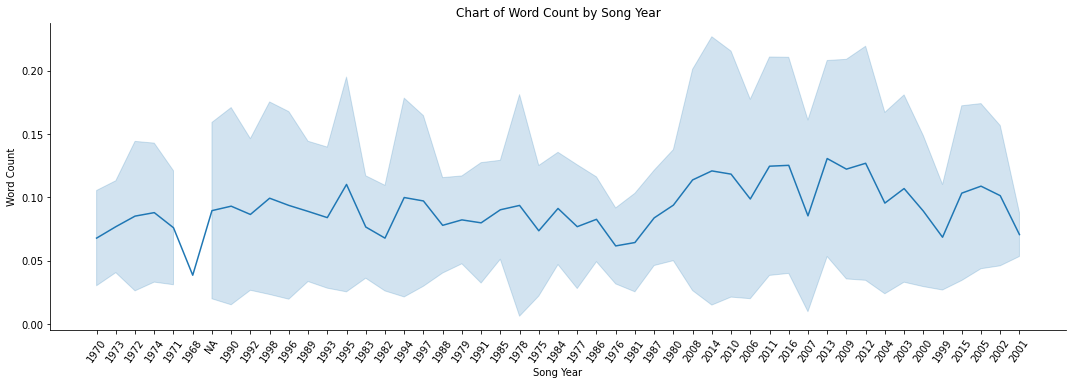

In [59]:
# (A) Use Seaborn Relplot to visualize normalization trends
# Build Plot
sns.relplot(data = df, x = "Year", y = "normalized_L", kind = "line", aspect = 3, ci = "sd");

# Add Rotation to X labels
locs, labels = plt.xticks()
plt.setp(labels, rotation = 55)

# Add X/Y Axis Labels
plt.title("Chart of Word Count by Song Year")
plt.xlabel("Song Year")
plt.ylabel("Word Count")

# Hide output
None

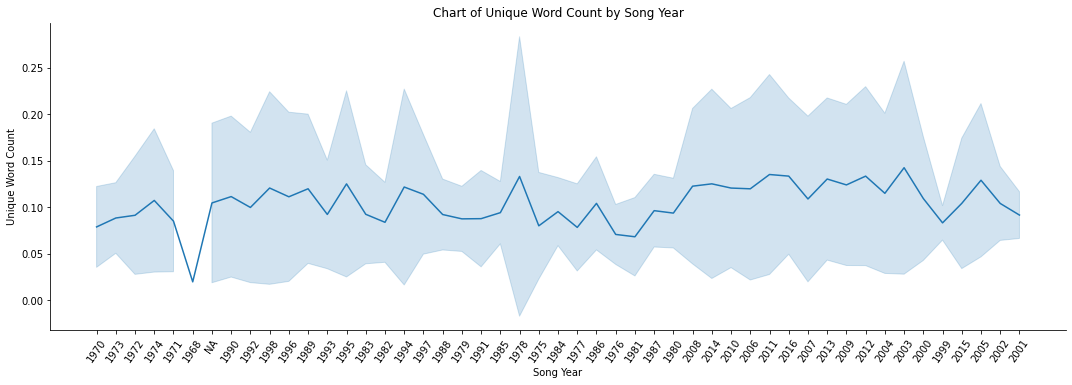

In [60]:
# (B)
# Build Plot
sns.relplot(data = df, x = "Year", y = "normalized_V", kind = "line", aspect = 3, ci = "sd");

# Add Rotation to X labels
locs, labels = plt.xticks()
plt.setp(labels, rotation = 55)

# Add X/Y Axis Labels
plt.title("Chart of Unique Word Count by Song Year")
plt.xlabel("Song Year")
plt.ylabel("Unique Word Count")

# Hide output
None

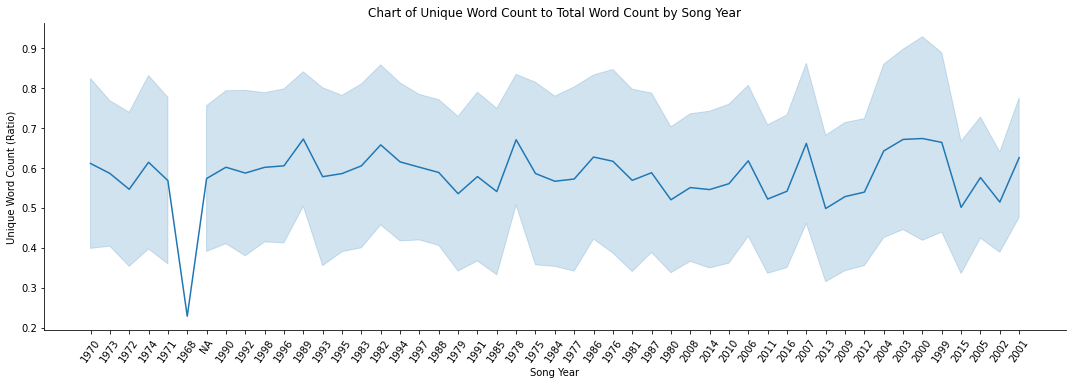

In [61]:
# (C)
# Build Plot
sns.relplot(data = df, x = "Year", y = "normalized_D", kind = "line", aspect = 3, ci = "sd");

# Add Rotation to X labels
locs, labels = plt.xticks()
plt.setp(labels, rotation = 55)

# Add X/Y Axis Labels
plt.title("Chart of Unique Word Count to Total Word Count by Song Year")
plt.xlabel("Song Year")
plt.ylabel("Unique Word Count (Ratio)")

# Hide output
None

## Part 7 - Save

In [62]:
df.to_csv("dataset_out.csv")